In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, StrMethodFormatter
import matplotlib as mpl
import astropy.units as u
import astropy.constants as const
from astropy.io import ascii
from astropy.table import Table, Column
import astrotools.orbitparams as orb
import astrotools.generateExoplanetTable as genTable
import pickle
import os
import copy

In [2]:
# grab a table of transiting terrestrial exoplanets from NASA Exoplante Archive
try: smallPlanetSystems = ascii.read('./NASAExoArchive_TransitingExoplanetTable.dat')
except:
    thiswd = os.getcwd()
    smallPlanetSystems = genTable.generateTransitingExoTable(outputpath=thiswd, 
                                                             sy_dist_upper=40, 
                                                             st_rad_upper=0.605,
                                                             st_mass_upper=0.58,
                                                             pl_rade_upper=1.85, 
                                                             pl_per_upper=30)
nplanets = len(smallPlanetSystems)
print("number of planets", nplanets)
smallPlanetSystems.pprint(show_unit=True)

number of planets 47
 hostname    pl_name     sy_dist      rastr     ... pl_orbincl tran_flag rv_flag
                                                ...                             
---------- ------------ ---------- ------------ ... ---------- --------- -------
   GJ 1132    GJ 1132 b     12.613 10h14m50.18s ...      86.58         1       1
   GJ 1252    GJ 1252 b     20.373 20h27m42.88s ...       84.8         1       1
   GJ 3473    GJ 3473 b    27.3644 08h02m22.47s ...      87.95         1       1
    GJ 357     GJ 357 b    9.44181 09h36m01.79s ...      89.12         1       1
    GJ 367     GJ 367 b    9.41263 09h44m29.15s ...      80.75         1       1
   GJ 3929    GJ 3929 b    15.8095 15h58m18.62s ...     88.442         1       1
    GJ 486     GJ 486 b    8.07426 12h47m55.57s ...       88.4         1       1
 HD 260655  HD 260655 b    10.0055 06h37m09.97s ...      87.35         1       1
 HD 260655  HD 260655 c    10.0055 06h37m09.97s ...      87.79         1       1
    K2-

In [3]:
# clean up individual planets
ind = np.argwhere(smallPlanetSystems['hostname'] == 'TRAPPIST-1')
smallPlanetSystems['st_raderr1'][ind] = 0.0013  # Agol+ 2020
smallPlanetSystems['st_raderr2'][ind] = -0.0013  # Agol+ 2020
smallPlanetSystems['st_mass'][ind] = 0.0898  # Mann+ 2019

ind = np.argwhere(smallPlanetSystems['hostname'] == 'LHS 1140')
smallPlanetSystems['st_raderr1'][ind] = 0.0035  # Lillo-Box+ 2020
smallPlanetSystems['st_raderr2'][ind] = -0.0035  # Lillo-Box+ 2020

ind = np.argwhere(smallPlanetSystems['pl_name'] == 'TOI-1468 b')
smallPlanetSystems['pl_orbsmax'][ind] = 0.02102086  # Charturvedi+ 2022

ind = np.argwhere(smallPlanetSystems['pl_name'] == 'GJ 1132 b')
smallPlanetSystems['pl_orbincl'][ind] = 88.68   # Dittmann+ (2017)

ind = np.argwhere(smallPlanetSystems['hostname'] == 'HD 260655')
smallPlanetSystems['st_rad'][ind] = 0.439
smallPlanetSystems['st_raderr1'][ind] = 0.003
smallPlanetSystems['st_raderr2'][ind] = -0.003

# refining parameters from Luque & Palle (2022)
ind = np.argwhere(smallPlanetSystems['pl_name'] == 'TOI-1634 b')
smallPlanetSystems['pl_rade'][ind]      = 1.773
smallPlanetSystems['pl_radeerr1'][ind]  = 0.077
smallPlanetSystems['pl_radeerr2'][ind]  = -0.077
smallPlanetSystems['pl_bmasse'][ind]     = 7.57
smallPlanetSystems['pl_bmasseerr1'][ind] = 0.71
smallPlanetSystems['pl_bmasseerr2'][ind] = -0.72

ind = np.argwhere(smallPlanetSystems['pl_name'] == 'TOI-1685 b')
smallPlanetSystems['pl_rade'][ind]      = 1.70
smallPlanetSystems['pl_radeerr1'][ind]  = 0.07
smallPlanetSystems['pl_radeerr2'][ind]  = -0.07
smallPlanetSystems['pl_bmasse'][ind]     = 3.09
smallPlanetSystems['pl_bmasseerr1'][ind] = 0.59
smallPlanetSystems['pl_bmasseerr2'][ind] = -0.58

ind = np.argwhere(smallPlanetSystems['pl_name'] == 'LHS 1815 b')
smallPlanetSystems['pl_rade'][ind]      = 1.088
smallPlanetSystems['pl_radeerr1'][ind]  = 0.064
smallPlanetSystems['pl_radeerr2'][ind]  = -0.064
smallPlanetSystems['pl_bmasse'][ind]     = 1.58
smallPlanetSystems['pl_bmasseerr1'][ind] = 0.64
smallPlanetSystems['pl_bmasseerr2'][ind] = -0.60

ind = np.argwhere(smallPlanetSystems['pl_name'] == 'L 98-59 c')
smallPlanetSystems['pl_rade'][ind]      = 1.34
smallPlanetSystems['pl_radeerr1'][ind]  = 0.07
smallPlanetSystems['pl_radeerr2'][ind]  = -0.07
smallPlanetSystems['pl_bmasse'][ind]     = 2.42
smallPlanetSystems['pl_bmasseerr1'][ind] = 0.35
smallPlanetSystems['pl_bmasseerr2'][ind] = -0.34

ind = np.argwhere(smallPlanetSystems['pl_name'] == 'L 98-59 d')
smallPlanetSystems['pl_rade'][ind]      = 1.58
smallPlanetSystems['pl_radeerr1'][ind]  = 0.08
smallPlanetSystems['pl_radeerr2'][ind]  = -0.08
smallPlanetSystems['pl_bmasse'][ind]     = 2.31
smallPlanetSystems['pl_bmasseerr1'][ind] = 0.46
smallPlanetSystems['pl_bmasseerr2'][ind] = -0.45

ind = np.argwhere(smallPlanetSystems['pl_name'] == 'TOI-1235 b')
smallPlanetSystems['pl_rade'][ind]      = 1.69
smallPlanetSystems['pl_radeerr1'][ind]  = 0.08
smallPlanetSystems['pl_radeerr2'][ind]  = -0.08
smallPlanetSystems['pl_bmasse'][ind]     = 6.69
smallPlanetSystems['pl_bmasseerr1'][ind] = 0.67
smallPlanetSystems['pl_bmasseerr2'][ind] = -0.69

ind = np.argwhere(smallPlanetSystems['pl_name'] == 'LTT 3780 b')
smallPlanetSystems['pl_rade'][ind]      = 1.32
smallPlanetSystems['pl_radeerr1'][ind]  = 0.06
smallPlanetSystems['pl_radeerr2'][ind]  = -0.06
smallPlanetSystems['pl_bmasse'][ind]     = 2.47
smallPlanetSystems['pl_bmasseerr1'][ind] = 0.24
smallPlanetSystems['pl_bmasseerr2'][ind] = -0.24

ind = np.argwhere(smallPlanetSystems['pl_name'] == 'LTT 3780 c')
smallPlanetSystems['pl_rade'][ind]      = 2.33
smallPlanetSystems['pl_radeerr1'][ind]  = 0.135
smallPlanetSystems['pl_radeerr2'][ind]  = -0.135
smallPlanetSystems['pl_bmasse'][ind]     = 7.02
smallPlanetSystems['pl_bmasseerr1'][ind] = 0.69
smallPlanetSystems['pl_bmasseerr2'][ind] = -0.67

ind = np.argwhere(smallPlanetSystems['pl_name'] == 'GJ 1252 b')
smallPlanetSystems['pl_rade'][ind]      = 1.193
smallPlanetSystems['pl_radeerr1'][ind]  = 0.74
smallPlanetSystems['pl_radeerr2'][ind]  = -0.74
smallPlanetSystems['pl_bmasse'][ind]     = 1.32
smallPlanetSystems['pl_bmasseerr1'][ind] = 0.28
smallPlanetSystems['pl_bmasseerr2'][ind] = -0.28

# adding LHS 475b from Lustig-Yaeger, et al. 2023
#'hostname', 'pl_name',  'sy_dist',    'rastr',        'decstr',       'sy_kmag', 'st_mass', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_teff', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_orbper', 'pl_orbsmax', 'pl_orbincl', 'tran_flag', 'rv_flag'
LHS475b = ['LHS 475', 'LHS 475 b', 12.482309021, '19h20m54.38s', '-82d33m16.17s', 7.686,    0.262,      0.2789,  0.0014,       -0.0014,      3300,      0.99,      0.05,          -0.05,         0.914,       0.187,           -0.187,          2.029088,    0.02058668,   87.194,       1,           0]
smallPlanetSystems.add_row(LHS475b)
nplanets = len(smallPlanetSystems)

In [4]:
smallPlanetSystems

hostname,pl_name,sy_dist,rastr,decstr,sy_kmag,st_mass,st_rad,st_raderr1,st_raderr2,st_teff,pl_rade,pl_radeerr1,pl_radeerr2,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_orbper,pl_orbsmax,pl_orbincl,tran_flag,rv_flag
str10,str12,float64,str12,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
GJ 1132,GJ 1132 b,12.613,10h14m50.18s,-47d09m17.77s,8.322,0.18,0.21,0.01,-0.01,3270.0,1.13,0.056,-0.056,1.66,0.23,-0.23,1.628931,0.0153,88.68,1,1
GJ 1252,GJ 1252 b,20.373,20h27m42.88s,-56d27m44.23s,7.915,0.38,0.39,0.02,-0.02,3458.0,1.193,0.74,-0.74,1.32,0.28,-0.28,0.5182416,0.00915,84.8,1,1
GJ 3473,GJ 3473 b,27.3644,08h02m22.47s,+03d20m13.79s,8.829001,0.36,0.36,0.01,-0.01,3347.0,1.264,0.05,-0.049,1.86,0.3,-0.3,1.1980035,0.01589,87.95,1,1
GJ 357,GJ 357 b,9.44181,09h36m01.79s,-21d39m54.23s,6.475,0.34,0.34,0.02,-0.02,3505.0,1.217,0.084,-0.083,1.84,0.31,-0.31,3.93072,0.035,89.12,1,1
GJ 367,GJ 367 b,9.41263,09h44m29.15s,-45d46m44.46s,5.78,0.45,0.46,0.01,-0.01,3522.0,0.718,0.054,-0.054,0.546,0.078,-0.078,0.321962,0.0071,80.75,1,1
GJ 3929,GJ 3929 b,15.8095,15h58m18.62s,+35d24m29.21s,7.869,0.31,0.32,0.01,-0.01,3384.0,1.09,0.04,-0.04,1.75,0.44,-0.45,2.616235,0.0252,88.442,1,1
GJ 486,GJ 486 b,8.07426,12h47m55.57s,+09d44m57.91s,6.362,0.32,0.33,0.01,-0.01,3340.0,1.305,0.063,-0.067,2.82,0.11,-0.12,1.467119,0.01734,88.4,1,1
HD 260655,HD 260655 b,10.0055,06h37m09.97s,+17d33m58.57s,5.862,0.44,0.439,0.003,-0.003,3803.0,1.24,0.023,-0.023,2.14,0.34,-0.34,2.76953,0.02933,87.35,1,1
HD 260655,HD 260655 c,10.0055,06h37m09.97s,+17d33m58.57s,5.862,0.44,0.439,0.003,-0.003,3803.0,1.533,0.051,-0.046,3.09,0.48,-0.48,5.70588,0.04749,87.79,1,1


In [5]:
Rp_Rs = ((np.array(smallPlanetSystems['pl_rade'])*u.R_earth)/(np.array(smallPlanetSystems['st_rad'])*u.R_sun)).decompose()
Teq = orb.Teq(np.array(smallPlanetSystems['st_teff'])*u.K, 0, np.array(smallPlanetSystems['st_rad'])*u.R_sun, np.array(smallPlanetSystems['pl_orbsmax'])*u.AU).decompose()
g_p = ((const.G*np.array(smallPlanetSystems['pl_bmasse'])*u.M_earth) / (np.array(smallPlanetSystems['pl_rade'])*u.R_earth)**2).to(u.m/u.s**2)
S = orb.insolation(Teff=np.array(smallPlanetSystems['st_teff'])*u.K, Teff_unc=np.array([0 for i in range(nplanets)])*u.K, Rs=np.array(smallPlanetSystems['st_rad'])*u.R_sun, Rs_unc=np.array([0 for i in range(nplanets)])*u.R_sun, a=np.array(smallPlanetSystems['pl_orbsmax'])*u.AU, a_unc=np.array([0 for i in range(nplanets)])*u.AU)[0]
S[0]

<Quantity 19.33914494>

In [6]:
c = Column(Rp_Rs, name='pl_rp_rs')
smallPlanetSystems.add_column(c)
c = Column(g_p, name='pl_g')
smallPlanetSystems.add_column(c)
c = Column(Teq, name='pl_teq_a0')
smallPlanetSystems.add_column(c)
c = Column(S, name='pl_s')
smallPlanetSystems.add_column(c)

In [7]:
#######################################################################################################################
## Basic rejection of data ############################################################################################
#######################################################################################################################

#vol_b = 4/3 * np.pi * np.array(smallPlanetSystems['pl_rade'])*u.R_earth**3      # volume of planets
#rho_p = np.array(smallPlanetSystems['pl_bmasse'])*u.M_earth / vol_b
#rho_p = rho_p.to(u.g/u.cm**3)

mask = np.ones(len(smallPlanetSystems))
#rho_mask = rho_p.value > 3
#mask *= rho_mask

pl_rad_err = np.mean([smallPlanetSystems['pl_radeerr1'], abs(smallPlanetSystems['pl_radeerr2'])], axis=0)
pl_mass_err = np.mean([smallPlanetSystems['pl_bmasseerr1'], abs(smallPlanetSystems['pl_bmasseerr2'])], axis=0)

mask *= pl_rad_err/smallPlanetSystems['pl_rade'] < 0.1
mask *= pl_mass_err/smallPlanetSystems['pl_bmasse'] < 0.25
# only planets with measured mass
mask *= smallPlanetSystems['rv_flag']==1
TRAPPISTind = np.argwhere(smallPlanetSystems['hostname']=='TRAPPIST-1')
mask[TRAPPISTind] = True


mask = mask.astype(bool)

sample_intermediate = copy.deepcopy(smallPlanetSystems)
sample_intermediate = sample_intermediate[mask]

print(len(sample_intermediate))
sample_intermediate.pprint(show_unit=True)
print('saving out first pass at sample')
ascii.write(sample_intermediate, 'sample_intermediate.csv', format='csv', overwrite=True)

27
 hostname    pl_name     sy_dist   ...     pl_teq_a0              pl_s       
                                   ...         K                             
---------- ------------ ---------- ... ------------------ -------------------
   GJ 1132    GJ 1132 b     12.613 ...  584.1777106923882   19.33914494051029
   GJ 3473    GJ 3473 b    27.3644 ...  768.2070915703122   57.83231621613784
    GJ 357     GJ 357 b    9.44181 ...  526.7769415618036  12.786873373040743
    GJ 367     GJ 367 b    9.41263 ... 1367.0122014436172   579.8917127598639
    GJ 486     GJ 486 b    8.07426 ...  702.6065400502282   40.46747345932615
 HD 260655  HD 260655 b    10.0055 ...  709.4729664292033  42.072735108287475
 HD 260655  HD 260655 c    10.0055 ...  557.5589590042498  16.047985852036135
   L 98-59    L 98-59 c    10.6194 ...  517.3063880405923  11.891830329088151
   L 98-59    L 98-59 d    10.6194 ...  409.1348729914873   4.652895864845344
  LHS 1140   LHS 1140 b    14.9861 ... 213.43594900558293 0.3

In [24]:
#######################################################################################################################
##### Selected sample by hand #########################################################################################
#######################################################################################################################

pl_names = ['GJ 1132 b', 
            #'GJ 367 b', 
            'GJ 486 b', 
            'L 168-9 b',
            'L 98-59 c', 
            #'LHS 1140 b', 
            'LHS 1140 c', 
            'LHS 1478 b', 
            #'LHS 475 b',  # fills similar parameter space as other planets; mass not measured.
            'LTT 1445 A b', 
            'LTT 3780 b', 
            'TOI-1468 b', 
            'TOI-1634 b', 
            #'TRAPPIST-1 c',
            #'TRAPPIST-1 d',
            'LHS 475 b'
           ]

#take all intermediate planets
pl_names = list(sample_intermediate['pl_name'])
try: pl_names.remove('GJ 9827 c')
except: pass
try: pl_names.remove('L 98-59 d')
except: pass
try: pl_names.remove('TOI-1685 b')
except: pass
try: pl_names.remove('TOI-776 b')
except: pass
try: pl_names.remove('HD 260655 c')
except: pass
try: pl_names.remove('LHS 1140 b')
except: pass
try: pl_names.remove('LTT 1445 A c')
except: pass
try: pl_names.remove('GJ 367 b')
except: pass
try: pl_names.remove('TRAPPIST-1 h')
except: pass
try: pl_names.remove('TRAPPIST-1 g')
except: pass
try: pl_names.remove('TRAPPIST-1 f')
except: pass
try: pl_names.remove('TRAPPIST-1 e')
except: pass
try: pl_names.remove('TRAPPIST-1 d')
except: pass
try: pl_names.remove('TRAPPIST-1 c')
except: pass
try: pl_names.remove('TRAPPIST-1 b')
except: pass
#try: pl_names.remove('GJ 1132 b')   # too similar to LHS 1478 b
#except: pass
#try: pl_names.remove('GJ 486 b')    # already MIRI/LRS program to look at atmosphere
#except: pass
#try: pl_names.remove('LTT 1445 A b') # already MIRI/LRS program to look at atmosphere
#except: pass

pl_inds = [i for i, e in enumerate(sample_intermediate['pl_name']) if e in set(pl_names)]

sample = copy.deepcopy(sample_intermediate)
mask = np.zeros(len(sample['pl_name'])).astype(bool)
mask[pl_inds] = True
sample = sample[mask]

print(len(sample))
sample.pprint(show_unit=True)
ascii.write(sample, 'sample_final.csv', format='csv', overwrite=True)

cmap = mpl.cm.inferno
norm = mpl.colors.Normalize(vmin=300, vmax=1000)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

13
 hostname    pl_name    sy_dist ...     pl_teq_a0            pl_s       
                                ...         K                           
---------- ------------ ------- ... ----------------- ------------------
   GJ 1132    GJ 1132 b  12.613 ... 584.1777106923882  19.33914494051029
   GJ 3473    GJ 3473 b 27.3644 ... 768.2070915703122  57.83231621613784
    GJ 357     GJ 357 b 9.44181 ... 526.7769415618036 12.786873373040743
    GJ 486     GJ 486 b 8.07426 ... 702.6065400502282  40.46747345932615
 HD 260655  HD 260655 b 10.0055 ... 709.4729664292033 42.072735108287475
   L 98-59    L 98-59 c 10.6194 ... 517.3063880405923 11.891830329088151
  LHS 1140   LHS 1140 c 14.9861 ... 399.3229614135901 4.2223523461028085
  LHS 1478   LHS 1478 b 18.2276 ... 599.6495187649439 21.470754020600786
LTT 1445 A LTT 1445 A b 6.86929 ... 428.5763916968226 5.6023509996997785
  LTT 3780   LTT 3780 b 21.9814 ... 887.8441162766738 103.18206671400262
  TOI-1468   TOI-1468 b 24.7399 ... 677.98321241

In [25]:
%matplotlib
plt.figure(figsize=(15, 5))

Fe100 = ascii.read('/home/hannah/Research/Library/ZengCompositions/Fe_100.txt')
plt.plot(Fe100['col1'], Fe100['col2'], color='#873e23', lw=2, alpha=0.8)

Earthlike = ascii.read('/home/hannah/Research/Library/ZengCompositions/Fe_32p5_MgSiO3_67p5_Earth.txt')
plt.plot(Earthlike['col1'], Earthlike['col2'], color='#e28743', lw=2, alpha=0.8)

MgSiO3 = ascii.read('/home/hannah/Research/Library/ZengCompositions/MgSiO3_100.txt')
plt.plot(MgSiO3['col1'], MgSiO3['col2'], color='#eab676', lw=2, alpha=0.8)

MgSiO3_50_H2O_50 = ascii.read('/home/hannah/Research/Library/ZengCompositions/MgSiO3_50_H2O_50.txt')
plt.plot(MgSiO3_50_H2O_50['col1'], MgSiO3_50_H2O_50['col2'], color='#448fa2', lw=1.5, alpha=0.8)

plt.errorbar(smallPlanetSystems['pl_bmasse'], 
             smallPlanetSystems['pl_rade'], 
             xerr=np.mean([smallPlanetSystems['pl_bmasseerr1'], abs(smallPlanetSystems['pl_bmasseerr2'])], axis=0), 
             yerr=np.mean([smallPlanetSystems['pl_radeerr1'], abs(smallPlanetSystems['pl_radeerr2'])], axis=0),
             fmt='.',
             color='grey',
             ecolor='grey',
             elinewidth=3,
             alpha=0.4,
             zorder=500,
             )

plt.errorbar(sample['pl_bmasse'], 
             sample['pl_rade'], 
             xerr=np.mean([sample['pl_bmasseerr1'], abs(sample['pl_bmasseerr2'])], axis=0), 
             yerr=np.mean([sample['pl_radeerr1'], abs(sample['pl_radeerr2'])], axis=0),
             fmt='.',
             color='grey',
             ecolor='grey',
             elinewidth=3,
             alpha=0.8,
             zorder=500,
             )

for i in range(len(sample)):
    plt.plot(sample['pl_bmasse'][i],
             sample['pl_rade'][i], 
             'o',
             markersize=sample['pl_rp_rs'][i]*300,
             markeredgecolor='grey',
             color=mapper.to_rgba(sample['pl_teq_a0'][i]),
             alpha=0.9,
             zorder=1000
            )
    plt.text(sample['pl_bmasse'][i],
             sample['pl_rade'][i]+0.02, 
             sample['pl_name'][i],
             zorder=2000)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', fraction=0.08, pad=0.02, aspect=12).set_label(label='Planet Equilibrium Temperature (K)', size=14)

plt.ylim(1, 1.9) # radius
plt.xlim(1, 9.8) # mass

plt.xscale('log')
#massrad['massrad'].set_yscale('log')
plt.xlabel('Planet Mass ($M_{\oplus}$)', fontsize=15)
plt.ylabel('Planet Radius ($R_{\oplus}$)', fontsize=15)
#plt.title('', fontsize=16)

plt.tick_params(axis='both', labelsize=12)
plt.tick_params(axis='both', which='minor')#, labelbottom=False)
plt.grid(axis='both', which='both', alpha=0.4)

plt.tick_params(axis='x', which='minor')
ax = plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.xaxis.set_minor_formatter(StrMethodFormatter('{x:.1f}'))

plt.tight_layout()

#plt.savefig('../Figure_TerrestrialSample.png', dpi=800)
plt.show()

Using matplotlib backend: Qt5Agg


In [26]:
# make context figures from different parameters
def make_context_fig(sample, x_string, y_string, x_label, y_label, savefig=False):
    plt.figure(figsize=(15, 5))

    for i in range(len(sample)):
        plt.plot(sample[x_string][i], 
                 sample[y_string][i], 
                 'o',
                 markersize=sample['pl_rp_rs'][i]*300,
                 markeredgecolor='grey',
                 color=mapper.to_rgba(sample['pl_teq_a0'][i]),
                 alpha=1.0,
                 zorder=500,
                 )
        plt.text(sample[x_string][i],
             sample[y_string][i], 
             sample['pl_name'][i],
             zorder=2000)

    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', fraction=0.08, pad=0.02, aspect=12).set_label(label='Planet Equilibrium Temperature (K)', size=14)

    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    #plt.title('', fontsize=16)

    plt.tick_params(axis='both', labelsize=12)
    plt.tick_params(axis='both', which='minor')#, labelbottom=False)
    plt.grid(axis='both', which='both', alpha=0.4)

    #plt.tick_params(axis='x', which='minor')
    #ax = plt.gca()
    #ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    #ax.xaxis.set_minor_formatter(StrMethodFormatter('{x:.1f}'))

    plt.tight_layout()

    if savefig: plt.savefig(f'../Figure_TerrestrialSample_{x_string}_{y_string}.png', facecolor='white')
    plt.show()

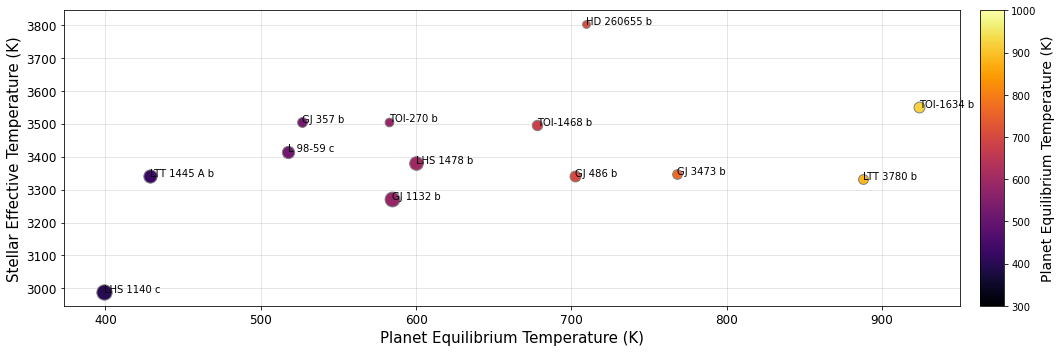

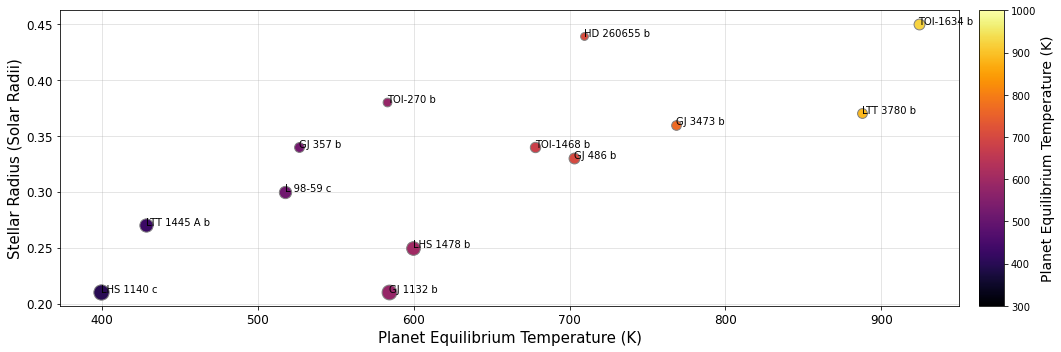

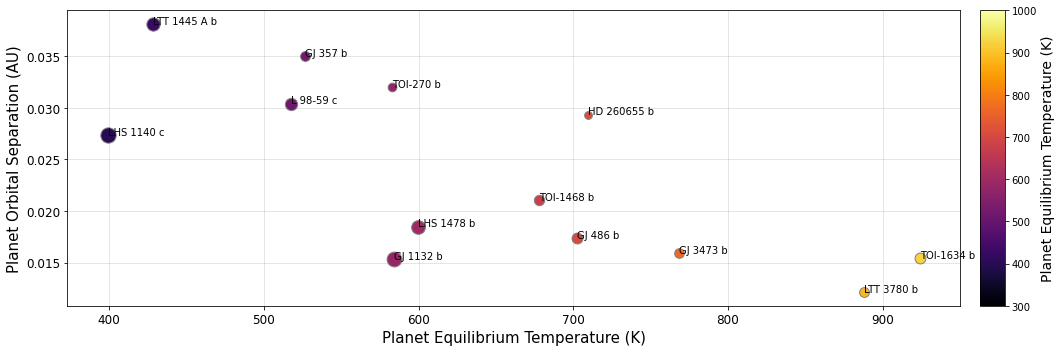

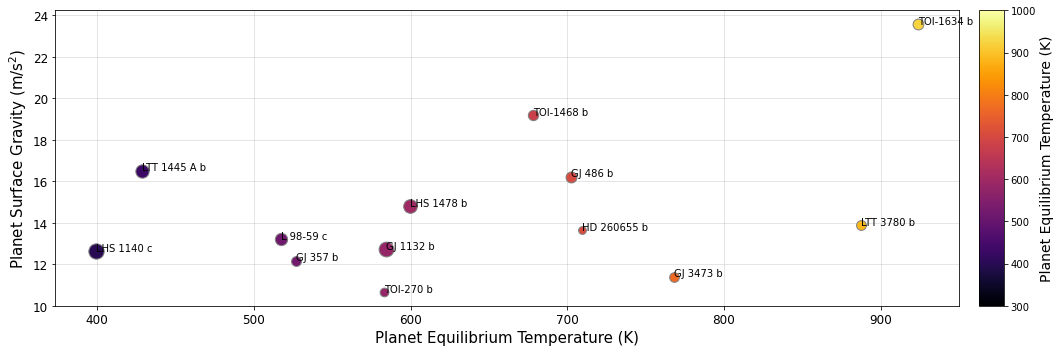

In [27]:
%matplotlib inline

make_context_fig(sample, 'pl_teq_a0', 'st_teff', 
                         'Planet Equilibrium Temperature (K)', 'Stellar Effective Temperature (K)')

make_context_fig(sample, 'pl_teq_a0', 'st_rad', 
                         'Planet Equilibrium Temperature (K)', 'Stellar Radius (Solar Radii)')

make_context_fig(sample, 'pl_teq_a0', 'pl_orbsmax',
                         'Planet Equilibrium Temperature (K)', 'Planet Orbital Separation (AU)')

make_context_fig(sample, 'pl_teq_a0', 'pl_g',
                         'Planet Equilibrium Temperature (K)', 'Planet Surface Gravity (m/s$^2$)')



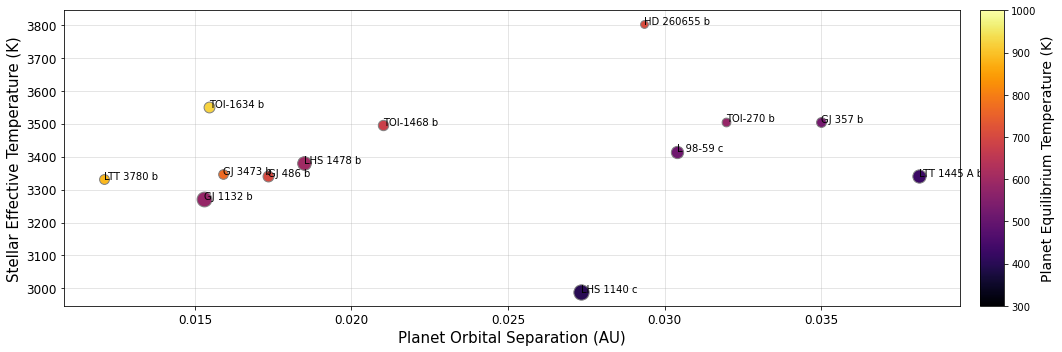

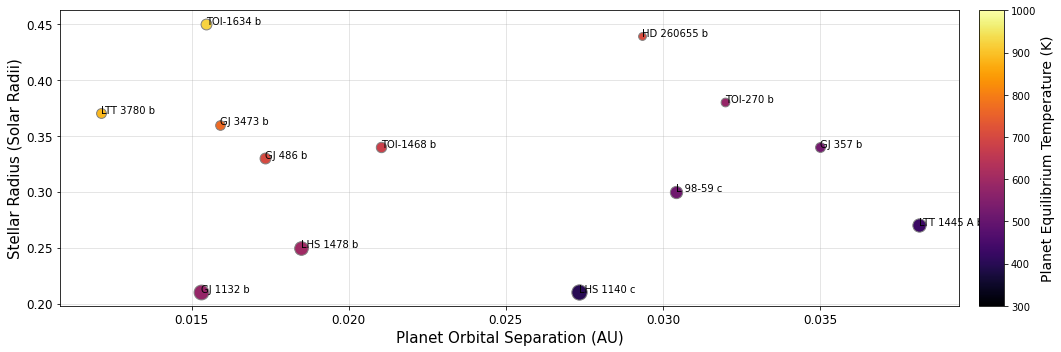

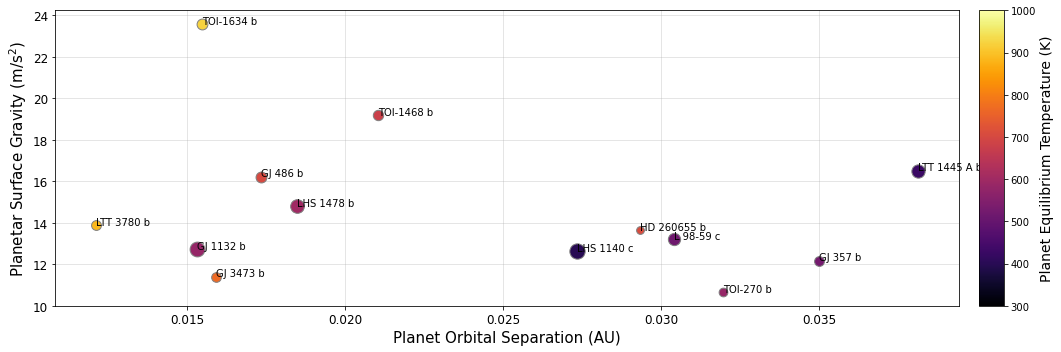

In [28]:
make_context_fig(sample, 'pl_orbsmax', 'st_teff',
                         'Planet Orbital Separation (AU)', 'Stellar Effective Temperature (K)',
                         savefig=True)

make_context_fig(sample, 'pl_orbsmax', 'st_rad',
                         'Planet Orbital Separation (AU)', 'Stellar Radius (Solar Radii)')

make_context_fig(sample, 'pl_orbsmax', 'pl_g',
                         'Planet Orbital Separation (AU)', 'Planetar Surface Gravity (m/s$^2$)')

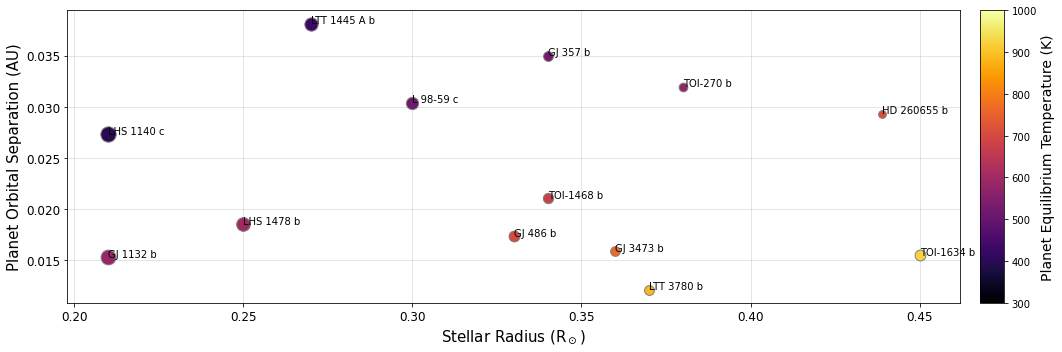

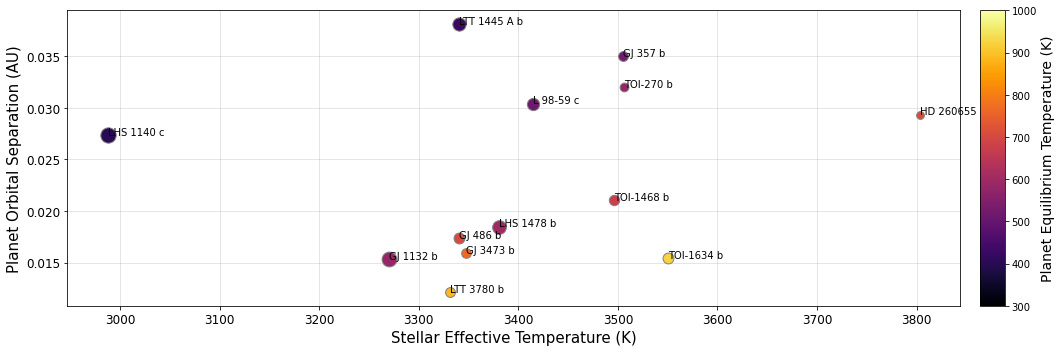

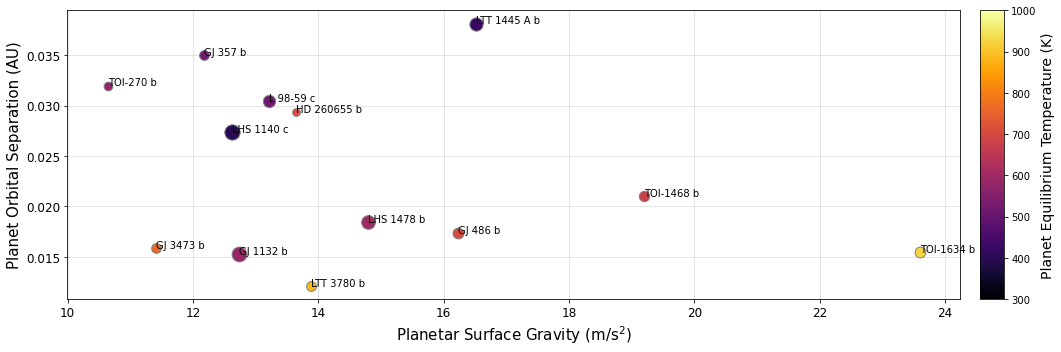

In [29]:
# context figures; make into "triptic"
# add emilinated planets to show that they overlap in parameter space
make_context_fig(sample, 'st_rad', 'pl_orbsmax',
                         'Stellar Radius (R$_\odot$)', 'Planet Orbital Separation (AU)')

make_context_fig(sample, 'st_teff', 'pl_orbsmax',
                         'Stellar Effective Temperature (K)', 'Planet Orbital Separation (AU)')

make_context_fig(sample, 'pl_g', 'pl_orbsmax',
                         'Planetar Surface Gravity (m/s$^2$)', 'Planet Orbital Separation (AU)')
